In [1]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols

# Import taiwan real estate data
taiwan_real_estate = pd.read_csv("./../../data/regression/taiwan_real_estate2.csv")
sp500_yearly_returns = pd.read_csv("./../../data/regression/sp500_yearly_returns.csv")
ad_conversion = pd.read_csv("./../../data/regression/ad_conversion.csv")
churn = pd.read_csv("./../../data/regression/churn.csv")

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)
mdl_price_vs_conv = mdl_price_vs_conv.fit()

ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25

mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

mdl_price_vs_dist = ols("price_twd_msq ~ dist_to_mrt_m", data=taiwan_real_estate).fit()

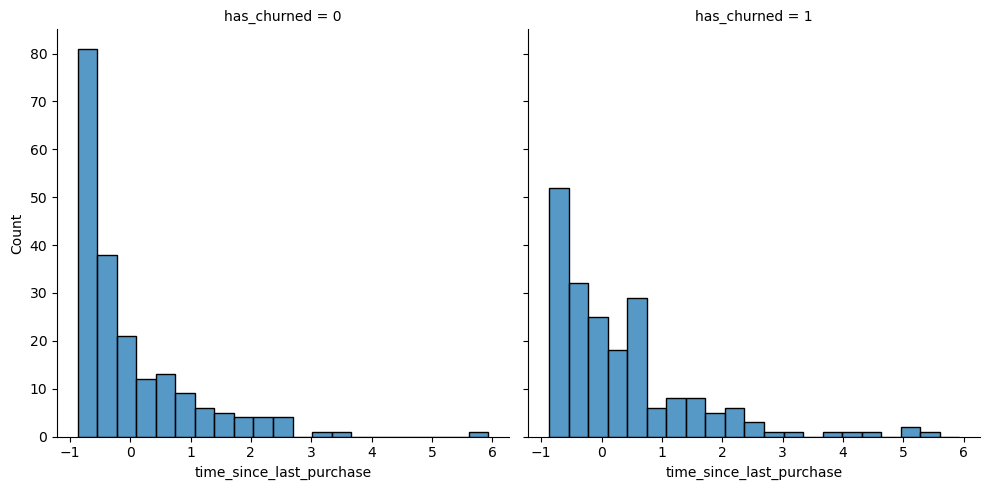

In [2]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, x="time_since_last_purchase", col="has_churned")

plt.show()

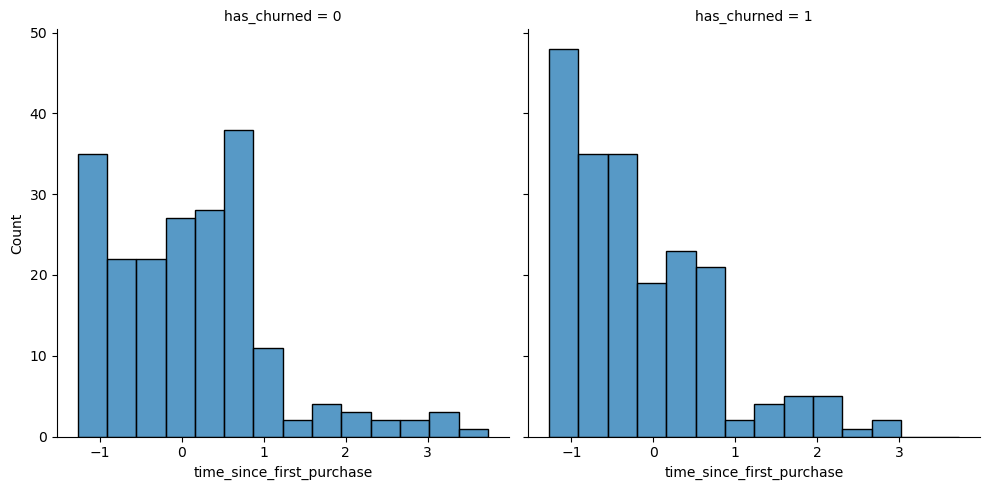

In [3]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn, x="time_since_first_purchase", col="has_churned")

plt.show()

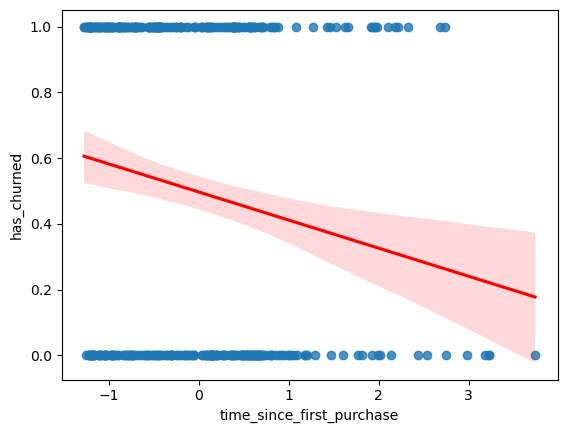

In [4]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data=churn, x="time_since_first_purchase", y="has_churned", 
            line_kws={"color": "red"})

plt.show()

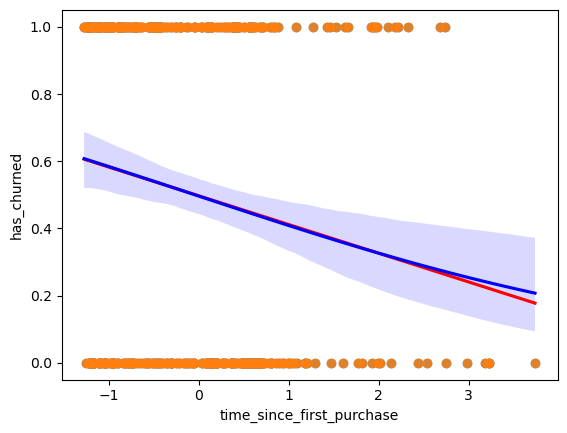

In [5]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data=churn,
        x="time_since_first_purchase",
        y="has_churned",
        logistic=True,
        line_kws={"color": "blue"})

plt.show()

In [6]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


In [7]:
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1.5, 4, .35)})

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.15     0.596964
2                      -0.80     0.566762
3                      -0.45     0.536056
4                      -0.10     0.505074


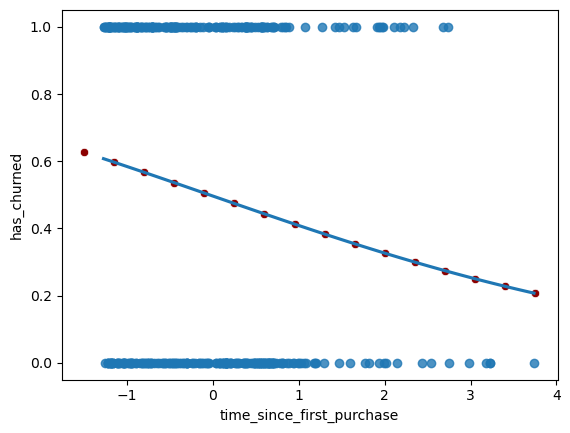

In [8]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="has_churned",
                data=prediction_data,
                color="darkred")

plt.show()

In [9]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.15     0.596964                  1.0
2                      -0.80     0.566762                  1.0
3                      -0.45     0.536056                  1.0
4                      -0.10     0.505074                  1.0


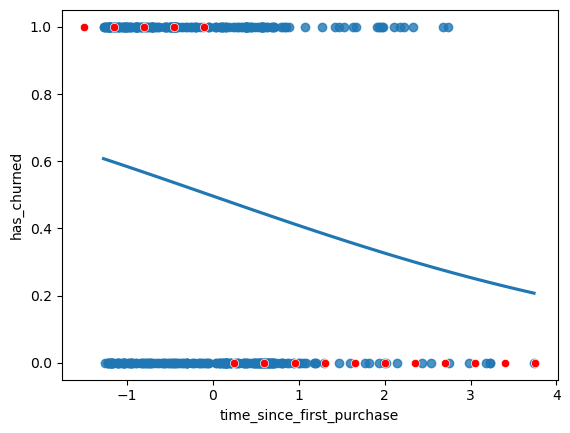

In [10]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Create a new figure
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

# Show the plot
plt.show()

In [11]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.15     0.596964                  1.0    1.481166
2                      -0.80     0.566762                  1.0    1.308199
3                      -0.45     0.536056                  1.0    1.155431
4                      -0.10     0.505074                  1.0    1.020502


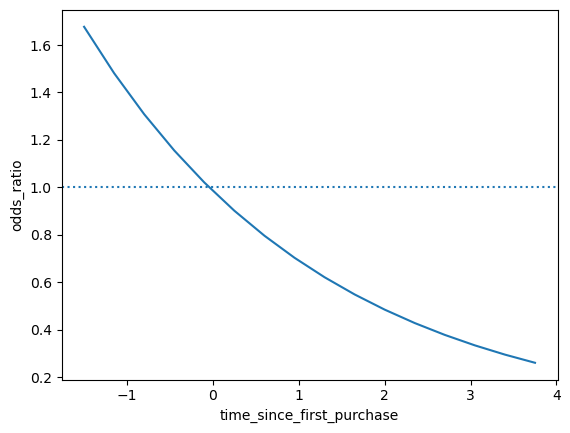

In [12]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio', data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

In [13]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data['odds_ratio'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.15     0.596964                  1.0    1.481166   
2                      -0.80     0.566762                  1.0    1.308199   
3                      -0.45     0.536056                  1.0    1.155431   
4                      -0.10     0.505074                  1.0    1.020502   

   log_odds_ratio  
0        0.517008  
1        0.392830  
2        0.268651  
3        0.144473  
4        0.020295  


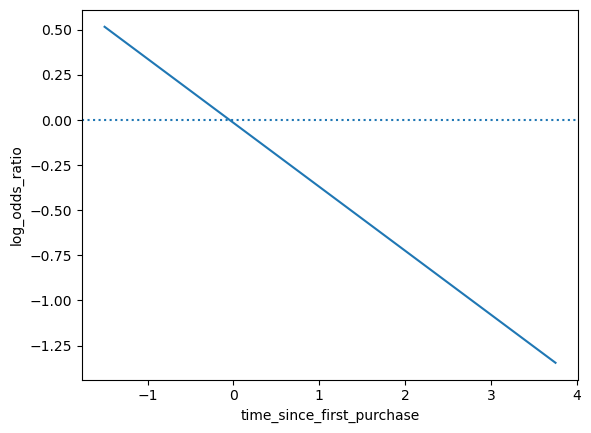

In [14]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

In [15]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
Name: count, dtype: int64


[[112.  88.]
 [ 76. 124.]]


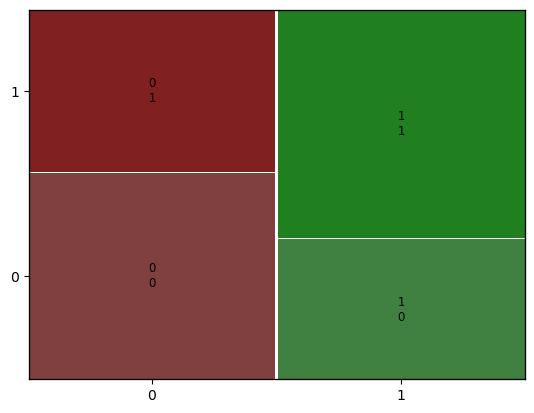

In [16]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [17]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
